In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline 

os.chdir("D:\Dropbox\Data-Analysis\Via\project\data")

# Typical Weekday and Weekend

## Load data 

In [2]:
def load_data(filename):
    df = pd.read_csv(filename)
    df.drop('Unnamed: 0',axis = 1,inplace=True)
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['minute'] = df['pickup_datetime'].apply(lambda x: x.minute)
    return df

In [3]:
wed = load_data('green_wk15_wed_zone.csv')
sat = load_data('green_wk15_sat_zone.csv')
sun = load_data('green_wk15_sun_zone.csv')

In [31]:
frames = [wed,sat,sun]
df = pd.concat(frames)
df.to_csv('green_data_3days.csv')

In [4]:
wed.shape

(48913, 13)

In [5]:
sat.shape

(71318, 13)

In [6]:
sun.shape

(59276, 13)

EDA of trip distance and time with Tableau

## Hourly trip number

In [9]:
def hourly_trip(df):
    df_hour = df.groupby('hour',as_index=False).count()[['hour','pickup_datetime']]
    df_hour.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
    return df_hour

In [13]:
wed_h = hourly_trip(wed)
sat_h = hourly_trip(sat)
sun_h = hourly_trip(sun)
hour_comp = wed_h.merge(sat_h,on='hour')
hour_comp = hour_comp.merge(sun_h,on='hour')
hour_comp.rename(columns = {'trip number_x':'wed trip number','trip number_y':'sat trip number','trip number':'sun trip number'}, inplace=True)
hour_comp

,hour,wed trip number,sat trip number,sun trip number
0,0,1603,4333,4970
1,1,1035,3829,4530
2,2,663,3229,3835
3,3,416,2580,3092
4,4,375,1880,2223
5,5,335,836,1122
6,6,632,698,670
7,7,1340,841,662
8,8,2246,1225,891
9,9,2300,1718,1236


In [16]:
hour_comp.to_csv('green_hourly_trip_comp.csv')

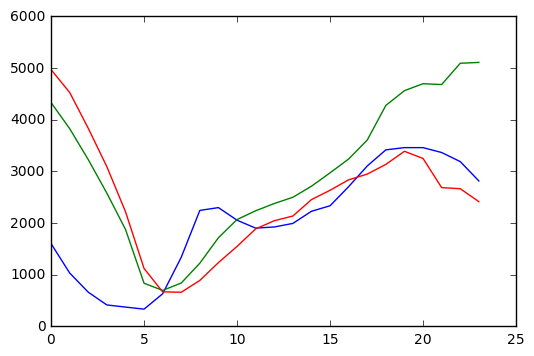

In [14]:
plt.plot(hour_comp[['wed trip number','sat trip number','sun trip number']])

Weekday trip has a morning peak when people go to work, and decrease after 8am. Saturday trip increases throughout the day and reach peak at midnight. Weekend trip in early morning is higher than weekday, mostly because people have late night activies on Saturday and Friday. Weekend does not have the morning peak and people travel less than weekday in the morning. 

## Most common pickup zones

Geo heatmap visualized with Tableau

In [17]:
def group_zone(df,col):
    df_gp = df.groupby(col,as_index=False).count()[[col,'pickup_datetime']]
    df_gp.sort_values('pickup_datetime',ascending=False,inplace=True)
    df_gp.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
    return df_gp

In [18]:
wed_pickup_zipcode = group_zone(wed,'pickup_zipcode')
wed_pickup_zipcode.head()

,pickup_zipcode,trip number
55,11201,3640
5,10027,2947
6,10029,2904
12,10035,2322
111,11373,1957


In [19]:
wed_pickup_neighborhood = group_zone(wed,'pickup_neighborhood')
wed_pickup_neighborhood.head()

,pickup_neighborhood,trip number
81,Harlem,3782
181,Williamsburg,3112
51,East Harlem,2861
80,Hamilton Heights,2312
89,Jackson Heights,2099


In [20]:
sat_pickup_zipcode = group_zone(sat,'pickup_zipcode')
sat_pickup_zipcode.head()

,pickup_zipcode,trip number
70,11211,4320
61,11201,3990
8,10027,3396
98,11249,3370
116,11373,2824


In [21]:
sat_pickup_neighborhood = group_zone(sat,'pickup_neighborhood')
sat_pickup_neighborhood.head()

,pickup_neighborhood,trip number
198,Williamsburg,7191
89,Harlem,4714
97,Jackson Heights,3955
88,Hamilton Heights,3241
179,Sunnyside Gardens,3121


In [22]:
sun_pickup_zipcode = group_zone(sun,'pickup_zipcode')
sun_pickup_zipcode.head()

,pickup_zipcode,trip number
70,11211,3692
61,11201,3155
98,11249,2836
116,11373,2510
7,10027,2414


In [23]:
sun_pickup_neighborhood = group_zone(sun,'pickup_neighborhood')
sun_pickup_neighborhood.head()

,pickup_neighborhood,trip number
200,Williamsburg,6056
90,Harlem,3934
98,Jackson Heights,3445
183,Sunnyside Gardens,2743
89,Hamilton Heights,2574


## Most common dropoff zones

In [24]:
wed_dropoff_zipcode = group_zone(wed,'dropoff_zipcode')
wed_dropoff_zipcode.head()

,dropoff_zipcode,trip number
24,10027,1708
95,11201,1567
32,10035,1285
22,10025,1284
26,10029,1249


In [25]:
wed_dropoff_neighborhood = group_zone(wed,'dropoff_neighborhood')
wed_dropoff_neighborhood.head() 

,dropoff_neighborhood,trip number
38,Bronx,2639
125,Harlem,2441
260,Upper West Side,1962
124,Hamilton Heights,1836
276,Williamsburg,1734


In [26]:
sat_dropoff_zipcode = group_zone(sat,'dropoff_zipcode')
sat_dropoff_zipcode.head()

,dropoff_zipcode,trip number
108,11211,2346
153,11368,1965
99,11201,1948
24,10027,1885
161,11377,1835


In [27]:
sat_dropoff_neighborhood = group_zone(sat,'dropoff_neighborhood')
sat_dropoff_neighborhood.head() 

,dropoff_neighborhood,trip number
293,Williamsburg,3919
38,Bronx,3370
128,Harlem,2845
127,Hamilton Heights,2540
140,Jackson Heights,2340


In [28]:
sun_dropoff_zipcode = group_zone(sun,'dropoff_zipcode')
sun_dropoff_zipcode.head()

,dropoff_zipcode,trip number
153,11368,1840
108,11211,1791
99,11201,1706
161,11377,1670
158,11373,1618


In [29]:
sun_dropoff_neighborhood = group_zone(sun,'dropoff_neighborhood')
sun_dropoff_neighborhood.head() 

,dropoff_neighborhood,trip number
289,Williamsburg,2959
35,Bronx,2686
135,Jackson Heights,2087
123,Harlem,2070
122,Hamilton Heights,1975


## Most common routes

In [32]:
wed_route_neightborhood = wed.groupby(['pickup_neighborhood','dropoff_neighborhood'],as_index=False).count()[['pickup_neighborhood','dropoff_neighborhood','pickup_datetime']]
wed_route_neightborhood.sort_values('pickup_datetime',ascending=False,inplace=True)
wed_route_neightborhood.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
wed_route_neightborhood.head()

,pickup_neighborhood,dropoff_neighborhood,trip number
534,Bronx,Bronx,1404
2479,Harlem,Harlem,840
4336,Williamsburg,Williamsburg,725
4271,Williamsburg,Greenpoint,566
2672,Jackson Heights,Jackson Heights,540


In [33]:
sat_route_neightborhood = sat.groupby(['pickup_neighborhood','dropoff_neighborhood'],as_index=False).count()[['pickup_neighborhood','dropoff_neighborhood','pickup_datetime']]
sat_route_neightborhood.sort_values('pickup_datetime',ascending=False,inplace=True)
sat_route_neightborhood.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sat_route_neightborhood.head()

,pickup_neighborhood,dropoff_neighborhood,trip number
570,Bronx,Bronx,1695
5315,Williamsburg,Williamsburg,1482
5231,Williamsburg,Greenpoint,940
2939,Harlem,Harlem,933
3223,Jackson Heights,Jackson Heights,843


In [36]:
sun_route_neightborhood = sun.groupby(['pickup_neighborhood','dropoff_neighborhood'],as_index=False).count()[['pickup_neighborhood','dropoff_neighborhood','pickup_datetime']]
sun_route_neightborhood.sort_values('pickup_datetime',ascending=False,inplace=True)
sun_route_neightborhood.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sun_route_neightborhood.head()

,pickup_neighborhood,dropoff_neighborhood,trip number
534,Bronx,Bronx,1315
5033,Williamsburg,Williamsburg,1110
4946,Williamsburg,Greenpoint,755
3057,Jackson Heights,Jackson Heights,718
2816,Harlem,Harlem,708


In [34]:
wed_route_zipcode = wed.groupby(['pickup_zipcode','dropoff_zipcode'],as_index=False).count()[['pickup_zipcode','dropoff_zipcode','pickup_datetime']]
wed_route_zipcode.sort_values('pickup_datetime',ascending=False,inplace=True)
wed_route_zipcode.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
wed_route_zipcode.head()

,pickup_zipcode,dropoff_zipcode,trip number
2222,11201,11201,550
170,10027,10027,420
264,10029,10029,404
4118,11373,11373,379
270,10029,10035,352


In [35]:
sat_route_zipcode = sat.groupby(['pickup_zipcode','dropoff_zipcode'],as_index=False).count()[['pickup_zipcode','dropoff_zipcode','pickup_datetime']]
sat_route_zipcode.sort_values('pickup_datetime',ascending=False,inplace=True)
sat_route_zipcode.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sat_route_zipcode.head()

,pickup_zipcode,dropoff_zipcode,trip number
5159,11373,11368,601
5052,11372,11368,581
2722,11201,11201,543
3248,11211,11211,523
3259,11211,11222,517


In [37]:
sun_route_zipcode = sun.groupby(['pickup_zipcode','dropoff_zipcode'],as_index=False).count()[['pickup_zipcode','dropoff_zipcode','pickup_datetime']]
sun_route_zipcode.sort_values('pickup_datetime',ascending=False,inplace=True)
sun_route_zipcode.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sun_route_zipcode.head()

,pickup_zipcode,dropoff_zipcode,trip number
4794,11373,11368,606
4699,11372,11368,446
2488,11201,11201,432
4799,11373,11373,429
2988,11211,11222,419


In shared rides, passengers may share close pick up and drop off locations, or get picked up en route which may cause additional travel time. To best design shared ride, it is best to implement dynamic on demand Travelling salesman problem algorithm. Such algorithm is built with parameters such as wait time, travel delay time, number of fleets, as route optimization. 

Here I am simplying the problem to calculate the aggregating ride efficiency as discussed in the following section.

# Efficiency of aggregating rides in Brooklyn

## County limited

Here, I am focusing on trips starting from Brooklyn, finishing in Brooklyn or Manhattan. 

In [38]:
wed_route_county = wed.groupby(['pickup_county','dropoff_county'],as_index=False).count()[['pickup_county','dropoff_county','pickup_datetime']]
wed_route_county.sort_values('pickup_datetime',ascending=False,inplace=True)
wed_route_county.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
wed_route_county

,pickup_county,dropoff_county,trip number
13,New York County,New York County,13353
7,Kings County,Kings County,13247
19,Queens County,Queens County,11209
8,Kings County,New York County,3272
1,Bronx County,Bronx County,2906
11,New York County,Bronx County,1383
18,Queens County,New York County,990
4,Bronx County,New York County,745
9,Kings County,Queens County,715
17,Queens County,Kings County,483


In [39]:
sat_route_county = sat.groupby(['pickup_county','dropoff_county'],as_index=False).count()[['pickup_county','dropoff_county','pickup_datetime']]
sat_route_county.sort_values('pickup_datetime',ascending=False,inplace=True)
sat_route_county.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sat_route_county

,pickup_county,dropoff_county,trip number
5,Kings County,Kings County,22508
17,Queens County,Queens County,17050
11,New York County,New York County,14514
6,Kings County,New York County,5465
0,Bronx County,Bronx County,3370
9,New York County,Bronx County,2051
16,Queens County,New York County,1918
7,Kings County,Queens County,1395
2,Bronx County,New York County,1177
15,Queens County,Kings County,1012


In [40]:
sun_route_county = sun.groupby(['pickup_county','dropoff_county'],as_index=False).count()[['pickup_county','dropoff_county','pickup_datetime']]
sun_route_county.sort_values('pickup_datetime',ascending=False,inplace=True)
sun_route_county.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sun_route_county

,pickup_county,dropoff_county,trip number
7,Kings County,Kings County,19072
19,Queens County,Queens County,14975
13,New York County,New York County,11190
8,Kings County,New York County,4459
0,Bronx County,Bronx County,2555
11,New York County,Bronx County,1665
18,Queens County,New York County,1485
9,Kings County,Queens County,1445
3,Bronx County,New York County,850
17,Queens County,Kings County,850


In [41]:
wed_bk_bk = wed[(wed['pickup_county']=='Kings County') & (wed['dropoff_county'] == 'Kings County')]
wed_bk_man = wed[(wed['pickup_county']=='Kings County') & (wed['dropoff_county'] == 'New York County')]
sat_bk_bk = sat[(sat['pickup_county']=='Kings County') & (sat['dropoff_county'] == 'Kings County')]
sat_bk_man = sat[(sat['pickup_county']=='Kings County') & (sat['dropoff_county'] == 'New York County')]
sun_bk_bk = sun[(sun['pickup_county']=='Kings County') & (sun['dropoff_county'] == 'Kings County')]
sun_bk_man = sun[(sun['pickup_county']=='Kings County') & (sun['dropoff_county'] == 'New York County')]

## Most common routes in Brooklyn

In [42]:
wed_route_neightborhood = wed_bk_bk.groupby(['pickup_neighborhood','dropoff_neighborhood'],as_index=False).count()[['pickup_neighborhood','dropoff_neighborhood','pickup_datetime']]
wed_route_neightborhood.sort_values('pickup_datetime',ascending=False,inplace=True)
wed_route_neightborhood.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
wed_route_neightborhood.head()

,pickup_neighborhood,dropoff_neighborhood,trip number
1451,Williamsburg,Williamsburg,725
1432,Williamsburg,Greenpoint,566
1053,Greenpoint,Williamsburg,326
1188,Park Slope,Park Slope,314
1410,Williamsburg,Bushwick,200


In [43]:
sat_route_neightborhood = sat_bk_bk.groupby(['pickup_neighborhood','dropoff_neighborhood'],as_index=False).count()[['pickup_neighborhood','dropoff_neighborhood','pickup_datetime']]
sat_route_neightborhood.sort_values('pickup_datetime',ascending=False,inplace=True)
sat_route_neightborhood.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sat_route_neightborhood.head()

,pickup_neighborhood,dropoff_neighborhood,trip number
1739,Williamsburg,Williamsburg,1482
1710,Williamsburg,Greenpoint,940
1218,Greenpoint,Williamsburg,692
1685,Williamsburg,Bushwick,520
1673,Williamsburg,Bedford-Stuyvesant,351


In [44]:
sun_route_neightborhood = sun_bk_bk.groupby(['pickup_neighborhood','dropoff_neighborhood'],as_index=False).count()[['pickup_neighborhood','dropoff_neighborhood','pickup_datetime']]
sun_route_neightborhood.sort_values('pickup_datetime',ascending=False,inplace=True)
sun_route_neightborhood.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sun_route_neightborhood.head()

,pickup_neighborhood,dropoff_neighborhood,trip number
1663,Williamsburg,Williamsburg,1110
1633,Williamsburg,Greenpoint,755
1165,Greenpoint,Williamsburg,563
1608,Williamsburg,Bushwick,477
1597,Williamsburg,Bedford-Stuyvesant,303


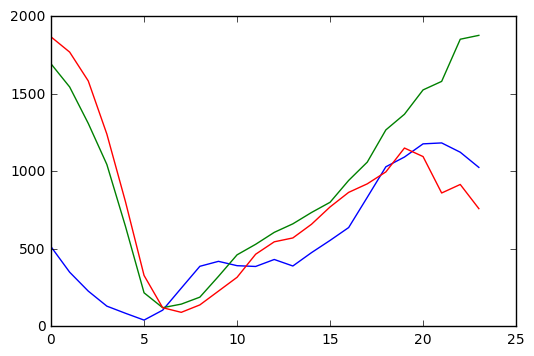

In [46]:
wed_h = hourly_trip(wed_bk_bk)
sat_h = hourly_trip(sat_bk_bk)
sun_h = hourly_trip(sun_bk_bk)
hour_comp = wed_h.merge(sat_h,on='hour')
hour_comp = hour_comp.merge(sun_h,on='hour')
hour_comp.rename(columns = {'trip number_x':'wed trip number','trip number_y':'sat trip number','trip number':'sun trip number'}, inplace=True)
plt.plot(hour_comp[['wed trip number','sat trip number','sun trip number']])

In [47]:
hour_comp.to_csv('green_hourly_trip_comp_bk_bk.csv')

Most common routes are within Williamsburg and Greenpoint on both weekday and weekend. 

## Most common routes from Brooklyn to Manhattan

In [49]:
wed_route_neightborhood = wed_bk_man.groupby(['pickup_neighborhood','dropoff_neighborhood'],as_index=False).count()[['pickup_neighborhood','dropoff_neighborhood','pickup_datetime']]
wed_route_neightborhood.sort_values('pickup_datetime',ascending=False,inplace=True)
wed_route_neightborhood.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
wed_route_neightborhood.head()

,pickup_neighborhood,dropoff_neighborhood,trip number
589,Williamsburg,Lower East Side,72
342,DUMBO,Tribeca,61
575,Williamsburg,East Village,51
570,Williamsburg,Chelsea,45
578,Williamsburg,Greenwich Village,41


In [50]:
sat_route_neightborhood = sat_bk_man.groupby(['pickup_neighborhood','dropoff_neighborhood'],as_index=False).count()[['pickup_neighborhood','dropoff_neighborhood','pickup_datetime']]
sat_route_neightborhood.sort_values('pickup_datetime',ascending=False,inplace=True)
sat_route_neightborhood.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sat_route_neightborhood.head()

,pickup_neighborhood,dropoff_neighborhood,trip number
715,Williamsburg,Lower East Side,224
690,Williamsburg,Alphabet City,134
703,Williamsburg,Greenwich Village,114
699,Williamsburg,East Village,112
694,Williamsburg,Chelsea,97


In [51]:
sun_route_neightborhood = sun_bk_man.groupby(['pickup_neighborhood','dropoff_neighborhood'],as_index=False).count()[['pickup_neighborhood','dropoff_neighborhood','pickup_datetime']]
sun_route_neightborhood.sort_values('pickup_datetime',ascending=False,inplace=True)
sun_route_neightborhood.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sun_route_neightborhood.head()

,pickup_neighborhood,dropoff_neighborhood,trip number
738,Williamsburg,Lower East Side,162
711,Williamsburg,Alphabet City,100
721,Williamsburg,East Village,90
518,Greenpoint,Lower East Side,69
715,Williamsburg,Chelsea,69


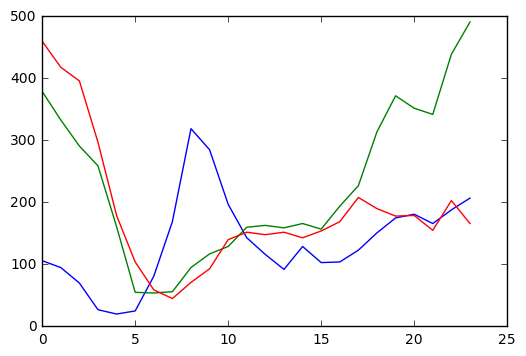

In [52]:
wed_h = hourly_trip(wed_bk_man)
sat_h = hourly_trip(sat_bk_man)
sun_h = hourly_trip(sun_bk_man)
hour_comp = wed_h.merge(sat_h,on='hour')
hour_comp = hour_comp.merge(sun_h,on='hour')
hour_comp.rename(columns = {'trip number_x':'wed trip number','trip number_y':'sat trip number','trip number':'sun trip number'}, inplace=True)
plt.plot(hour_comp[['wed trip number','sat trip number','sun trip number']])

In [53]:
hour_comp.to_csv('green_hourly_trip_comp_bk_man.csv')

Much more trips going from Brooklyn to Lower Manhattan on weekend, and mostly originated from Williamsburg. Most trips going to Manhattan are in the morning during rush hour on Weekday, and trips going to Manhattan on Weekend are in late night or overnight. Trips going to Manhattan on Sunday afternoon is lower than Saturday. 

## Define Aggregating ride efficiency

To calcualte the efficiency, I simply the problem and define aggregating ride as more than 1 trip with the following conditions
1) same pickup and dropoff zipcodes
2) pickup demand time <= 5 min
3) number of trip > 1
4) number of passengers each trip is 6 full capacity

I understand that in reality, efficiency is related to occupancy and availability of taxis (maximal 100%), average wait time, average delay time, for one aggregating trip (one car). Whether or not drivers decide to pick up the passengers en route require additional route optimizaiton. I do not include fare in the efficiency calculation. 

Efficiency in my model is defined as the percentage of possible aggregating rides over all rides from the same pickup zipcode. 

### Hourly efficiency by day

In [54]:
sat_bk_bk_aggr_zipcode = sat_bk_bk.groupby(['pickup_zipcode','dropoff_zipcode'],as_index=False).count()[['pickup_zipcode','dropoff_zipcode','pickup_datetime']]
sat_bk_bk_aggr_zipcode.sort_values('pickup_datetime',ascending=False,inplace=True)
sat_bk_bk_aggr_zipcode.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sat_bk_bk_aggr_zipcode.head()

,pickup_zipcode,dropoff_zipcode,trip number
1,11201,11201,542
254,11211,11211,523
265,11211,11222,517
937,11249,11211,415
540,11222,11211,353


In [55]:
sat_bk_bk_pickup_zipcode = sat_bk_bk.groupby('pickup_zipcode',as_index=False).count()[['pickup_zipcode','pickup_datetime']]
sat_bk_bk_pickup_zipcode.sort_values('pickup_datetime',ascending=False,inplace=True)
sat_bk_bk_pickup_zipcode.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
sat_bk_bk_pickup_zipcode.head()

,pickup_zipcode,trip number
10,11211,2974
1,11201,2916
38,11249,2101
16,11217,1926
14,11215,1597


In [58]:
def perxmin(df,x):
    # aggregate every x minutes
    dfs = []
    N = 60
    i = 0
    while i < N:
        dfi = df[(df['minute'] >= i) & (df['minute'] <i+x)].copy()
        dfs.append(dfi)
        i = i + x
    return dfs

In [59]:
def aggr_trip(df):
    df_gp = df.groupby(['pickup_zipcode','dropoff_zipcode'],as_index=False)
    df_trip_num = df_gp.count()[['pickup_zipcode','dropoff_zipcode','pickup_datetime']]
    df_passenger_num = df_gp.sum()[['pickup_zipcode','dropoff_zipcode','passenger_count']]
    df_eff = df_trip_num.merge(df_passenger_num)
    df_eff.rename(columns = {'pickup_datetime':'trip number'}, inplace=True)
    df_eff['aggr trip number'] = np.where(df_eff['trip number'] == 1,0,np.ceil(1.*df_eff['passenger_count']/6))
    df_eff['non aggr trip number'] = np.where(df_eff['trip number'] == 1,1,0)
    return df_eff

In [61]:
def aggr_eff(df):
    df_eff = aggr_trip(df)
    df2 = df_eff.groupby('pickup_zipcode',as_index=False).sum()[['pickup_zipcode','passenger_count','aggr trip number','non aggr trip number']]
    df2['aggr eff'] = 1.*df2['aggr trip number'] / (df2['aggr trip number'] + df2['non aggr trip number'] ) 
    return df2

In [62]:
sat_bk_bk_eff = aggr_eff(sat_bk_bk)
sat_bk_man_eff = aggr_eff(sat_bk_man)

In [63]:
def aggr_eff_all(df):
    if df.empty:
        return 0
    else:
        df2 = aggr_eff(df)
        return df2['aggr eff'].mean()

In [64]:
aggr_eff_all(sat_bk_bk[sat_bk_bk['hour'] ==22])

0.4587714428039899

In [65]:
def hourly_efficiency(df,hour):
    df_hour = df[df['hour'] ==hour]
    dfs = perxmin(df_hour,5) # set as 5 min, wait time window 5 min
    hourly_eff = np.mean([aggr_eff_all(df) for df in dfs])
    return hourly_eff

In [66]:
hourly_efficiency(sat_bk_bk,22)

0.18252506231992974

In [67]:
hours = range(24)

In [69]:
def hourly_eff_day(df):
    return [hourly_efficiency(df,h) for h in hours]

In [80]:
sat_bk_bk_eff = hourly_eff_day(sat_bk_bk)
sat_bk_man_eff = hourly_eff_day(sat_bk_man)
sun_bk_bk_eff = hourly_eff_day(sun_bk_bk)
sun_bk_man_eff = hourly_eff_day(sun_bk_man)
wed_bk_bk_eff = hourly_eff_day(wed_bk_bk)
wed_bk_man_eff = hourly_eff_day(wed_bk_man)

In [81]:
cols = ['hour','wed_bk_bk','wed_bk_man','sat_bk_bk','sat_bk_man','sun_bk_bk','sun_bk_man']
df_hourly_eff = pd.DataFrame(data=None, columns=cols)

In [82]:
df_hourly_eff['hour'] = hours
df_hourly_eff['wed_bk_bk'] = wed_bk_bk_eff
df_hourly_eff['wed_bk_man'] = wed_bk_man_eff
df_hourly_eff['sat_bk_bk'] = sat_bk_bk_eff
df_hourly_eff['sat_bk_man'] = sat_bk_man_eff
df_hourly_eff['sun_bk_bk'] = sun_bk_bk_eff
df_hourly_eff['sun_bk_man'] = sun_bk_man_eff
df_hourly_eff

,hour,wed_bk_bk,wed_bk_man,sat_bk_bk,sat_bk_man,sun_bk_bk,sun_bk_man
0,0,0.078975,0.019444,0.183372,0.072727,0.167388,0.074911
1,1,0.052457,0.058449,0.192233,0.084009,0.168971,0.061709
2,2,0.060056,0.025000,0.134911,0.062200,0.170000,0.069742
3,3,0.114286,0.062500,0.149407,0.079682,0.158634,0.054126
4,4,0.013889,0.000000,0.071818,0.041804,0.134969,0.051620
5,5,0.000000,0.000000,0.057023,0.013889,0.051050,0.029101
6,6,0.068216,0.020999,0.031250,0.000000,0.025196,0.000000
7,7,0.082858,0.018927,0.027083,0.000000,0.018750,0.037500
8,8,0.122437,0.040591,0.028100,0.030556,0.031481,0.018849
9,9,0.138288,0.057077,0.059264,0.009425,0.053856,0.013889


In [83]:
df_hourly_eff.to_csv('hourly_eff_by_day.csv')

### Hourly aggregating ride efficiency and hourly trip number

In [90]:
def get_corr(df,df_eff):
    df_count = df.groupby('hour',as_index=False).count()['dayofweek']
    dfs = pd.DataFrame(df_eff)
    dfs['1'] = df_count
    return dfs.corr()[0][1]

In [91]:
get_corr(sat_bk_bk,sat_bk_bk_eff)

0.93683812976643399

In [92]:
get_corr(sun_bk_bk,sun_bk_bk_eff)

0.89590479561084435

In [93]:
get_corr(wed_bk_bk,wed_bk_bk_eff)

0.84124352593548091

In [94]:
get_corr(sat_bk_man,sat_bk_man_eff)

0.86063601845794979

In [95]:
get_corr(sun_bk_man,sun_bk_man_eff)

0.70871676579439302

In [96]:
get_corr(wed_bk_man,wed_bk_man_eff)

0.39872043483869035